## CS516 Medical Imaging
### Assignment 2
### Luyun Nie 002268087
### Junjia Lin 002268506

### Part 1: Joint histogram

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import math
from scipy.interpolate import interp2d

In [2]:
# Import images
I1 = plt.imread("/Users/tinan/Downloads/Data/I1.png")
J1 = plt.imread("/Users/tinan/Downloads/Data/J1.png")
I1 = I1[:,:,2]

I2 = plt.imread("/Users/tinan/Downloads/Data/I2.jpg")
J2 = plt.imread("/Users/tinan/Downloads/Data/J2.jpg")

I3 = plt.imread("/Users/tinan/Downloads/Data/I3.jpg")
J3 = plt.imread("/Users/tinan/Downloads/Data/J3.jpg")

I4 = plt.imread("/Users/tinan/Downloads/Data/I4.jpg")
J4 = plt.imread("/Users/tinan/Downloads/Data/J4.jpg")

I5 = plt.imread("/Users/tinan/Downloads/Data/I5.jpg")
J5 = plt.imread("/Users/tinan/Downloads/Data/J5.jpg")

I6 = plt.imread("/Users/tinan/Downloads/Data/I6.jpg")
J6 = plt.imread("/Users/tinan/Downloads/Data/J6.jpg")

imgs_I = [I1,I2,I3,I4,I5,I6]
imgs_J = [J1,J2,J3,J4,J5,J6]

#### Question (a): Calculates the joint histogram of two same size images

In [3]:
def JointHist(I,J,bin):
    #Test the size of two images
    if I.shape == J.shape:
        row = I.shape[0]
        col = I.shape[1]
        minI = np.min(I)
        minJ = np.min(J)
        #Set the bin size
        bins = np.zeros((bin+1,bin+1))
        #Set each bin's volumne
        binI = (np.max(I)-np.min(I))/bin
        binJ = (np.max(J)-np.min(J))/bin
        #Count each bin's appearance
        for i in range(row):
            for j in range(col):
                bins[int((I[i][j]-minI)/binI)][int((J[i][j]-minJ)/binJ)] \
                = bins[int((I[i][j]-minI)/binI)][int((J[i][j]-minJ)/binJ)]+1
        return bins
    else:
        return None

#### Question (b): Proof the n*p

In [4]:
def ProofSum(I,J):
    if I.shape == J.shape:
        shapeMultiple = I.shape[0]*I.shape[1]
        #Utilize the min value of unique elements from two images as the bin
        a = JointHist(I,J,bin=min(len(np.unique(I)),len(np.unique(J))))
        freqsum = np.sum(a)
        #If true, return True
        return freqsum == shapeMultiple
    else:
        return None

In [5]:
#Print the proofs
for i in range(6):
    print(ProofSum(imgs_I[i],imgs_J[i]))

True
True
True
True
True
True


#### Question(c):Plot the joint histogram of each pair

<ipython-input-6-07fe7a0b6d65>:5: RuntimeWarning: divide by zero encountered in log10
  bins = np.log10(JointHist(I[i],J[i],50))


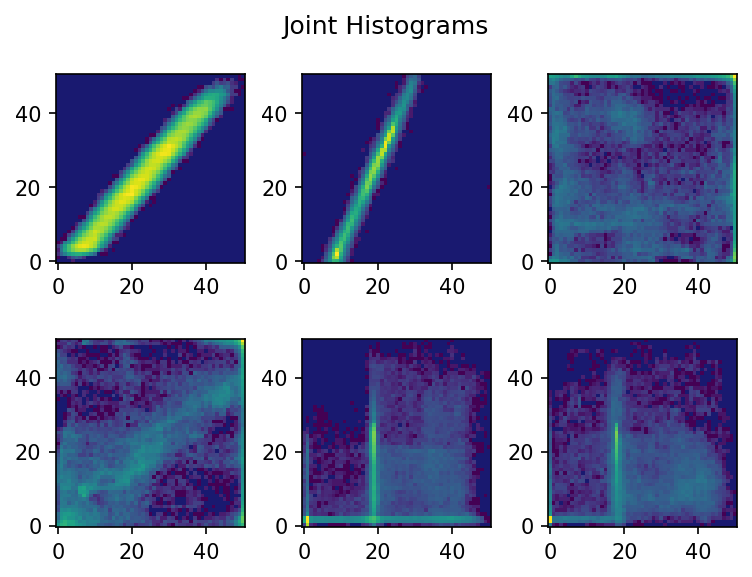

In [6]:
def PlotJointHist(I,J):
    plt.figure(dpi=150)
    for i in range(6):
        plt.subplot(2,3,i+1,facecolor="midnightblue")
        bins = np.log10(JointHist(I[i],J[i],50))
        plt.imshow(bins,origin = 'lower')
    plt.subplots_adjust(wspace=0.2, hspace=0.4)
    plt.suptitle("Joint Histograms")
PlotJointHist(imgs_I,imgs_J)

#### Question(d): Compare results

Answer: From the first image, we find that the I1 and J1 joint histogram is more like a line of y = x, which means their values are almost eaqual. Furtherly, we consider the two images are quite the same.Similarly,I2 and J2's joint histogram is also a line but has higher slope.In another words, they are not quite the same but similar.One of these two images has higher brightness.Differently, the third image shows that I3 and J3 have not much connection or similarity because the joint histogram doesn't present any obvious line.Although the fourth image has slightly blurred line but it is also not distinct. The fifth image and the sixth image which stand for I5,J5 and I6,J6 respectively both show vertical and horizontal bins.We guess that these two pairs have similar gray or brightness but different data.

### Part 2: Similarity criteria 

#### Question(a): Find SSD

In [7]:
def SSD(I,J):
    if I.shape == J.shape:
        SSD = np.sum((np.array(I)- np.array(J))**2)
        return SSD
    else:
        return None

#### Question(b): Find Correlation

In [8]:
def Corr(I,J):
    if I.shape == J.shape:
        Corr = np.mean((np.array(I)-np.mean(I))*(np.array(J)-np.mean(J)))/(np.std(I)*np.std(J))
        return Corr
    else:
        return None

#### Question(c): Find mutual information

In [9]:
def MI(I,J):
    if I.shape == J.shape:
        #Utilize the min value of unique elements from two images as the bin
        bins = JointHist(I,J,bin=min(len(np.unique(I)),len(np.unique(J))))
        row = bins.shape[0]
        bins = bins/np.sum(bins)
        thesum = 0
        mi = np.zeros((row,row))
        for i in range(row):
            for j in range(row):
                mi[i][j]= np.nan_to_num(np.log(bins[i][j]\
                /(np.sum(bins[:,j])*np.sum(bins[i,:]))))*bins[i][j]
                thesum = thesum + mi[i][j]
        return thesum
    else:
        return None

#### Question(d): Compare results

In [10]:
for i in range(6):
    print("SSD results: ", i+1, SSD(imgs_I[i],imgs_J[i]))
    print("Corr results: ", i+1, Corr(imgs_I[i],imgs_J[i]))   
    print("MI results: ", i+1, MI(imgs_I[i],imgs_J[i]))   

SSD results:  1 408.6759
Corr results:  1 0.97818255


<ipython-input-9-70c3de8118d7>:11: RuntimeWarning: divide by zero encountered in log
  mi[i][j]= np.nan_to_num(np.log(bins[i][j]\
<ipython-input-9-70c3de8118d7>:11: RuntimeWarning: invalid value encountered in double_scalars
  mi[i][j]= np.nan_to_num(np.log(bins[i][j]\


MI results:  1 1.550954432056993
SSD results:  2 30364219
Corr results:  2 0.9962134367832856
MI results:  2 2.1085554718756647
SSD results:  3 4401503
Corr results:  3 0.14339070113716768
MI results:  3 0.6687586245620808
SSD results:  4 3848301
Corr results:  4 0.5640342309868849
MI results:  4 1.0241532987504467
SSD results:  5 20998301
Corr results:  5 0.6564367191426469
MI results:  5 0.554656419558173
SSD results:  6 42510000
Corr results:  6 0.7802495447255011
MI results:  6 0.6726891682785368


### Part 3: Spatial transforms 

#### Question(a): Generate a 3d grid

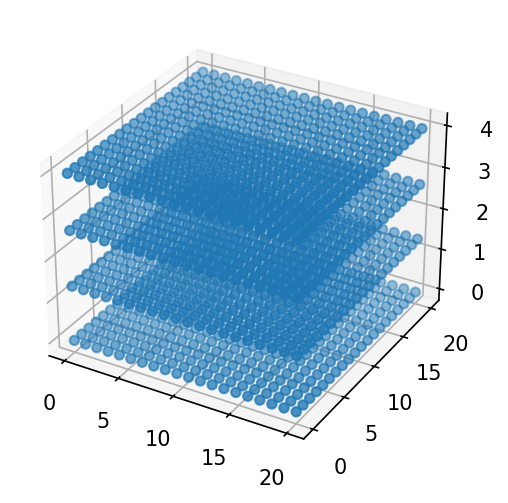

In [11]:
plt.figure(dpi = 150)
array1 = np.linspace(0,20,20)
array3 = np.linspace(0,4,4)
X,Y,Z = np.meshgrid(array1,array1,array3)
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, Z)

#### Question(b):  Rigid transform function

In [12]:
def rigid_transform(theta, omega, phi, p, q, r,rigidp):
    theta = np.deg2rad(theta)
    omega = np.deg2rad(omega)
    phi = np.deg2rad(phi)
    Rx_zy = [[1,0,0,0],
         [0,np.cos(theta),-np.sin(theta),0],
         [0,np.sin(theta),np.cos(theta),0],
         [0,0,0,1]]
    Ry_xz = [[np.cos(omega),0,np.sin(omega),0],
         [0,1,0,0],
         [-np.sin(omega),0,np.cos(omega),0],
         [0,0,0,1]]
    Rz_yx = [[np.cos(phi),-np.sin(phi),0,0],
         [np.sin(phi),np.cos(phi),0,0],
         [0,0,1,0],
         [0,0,0,1]]
    t = [[1,0,0,p],
         [0,1,0,q],
         [0,0,1,r],
         [0,0,0,1]]
    RTrigid = np.dot(t,np.dot(np.linalg.multi_dot([Rx_zy,Ry_xz,Rz_yx]),rigidp))
    return RTrigid


Text(0.5, 0.98, 'Rotation and Transform Rigids')

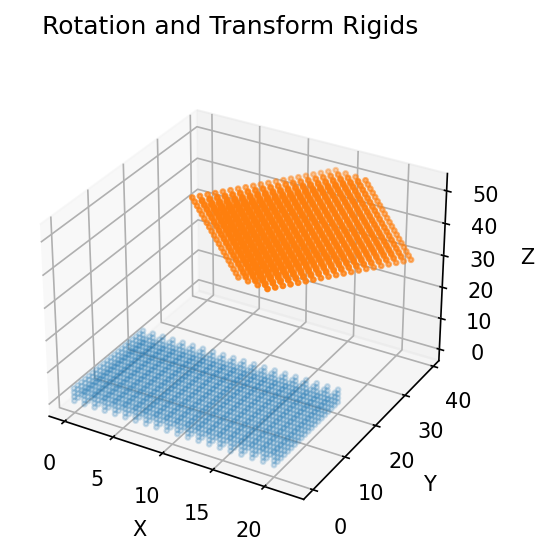

In [13]:
rigidp = [np.ravel(X),np.ravel(Y),np.ravel(Z),np.ones(np.ravel(X).shape)]
RTrigidp = rigid_transform(60,60,30, 10,20,30,rigidp)

fig = plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(X,Y,Z,marker = '.' ,alpha=0.2)
ax.scatter3D(RTrigidp[0],RTrigidp[1],RTrigidp[2],marker = '.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.suptitle("Rotation and Transform Rigids")

#### Question(c): Affline transform function

In [14]:
def affine_transfoTrm(s, theta, omega, phi, p, q, r,rigidp):
    theta = np.deg2rad(theta)
    omega = np.deg2rad(omega)
    phi = np.deg2rad(phi)
    Rscal = [[s,0,0,0],
             [0,s,0,0],
             [0,0,s,0],
             [0,0,0,1]]
    Rx_zy = [[1,0,0,0],
         [0,np.cos(theta),-np.sin(theta),0],
         [0,np.sin(theta),np.cos(theta),0],
         [0,0,0,1]]
    Ry_xz = [[np.cos(omega),0,np.sin(omega),0],
         [0,1,0,0],
         [-np.sin(omega),0,np.cos(omega),0],
         [0,0,0,1]]
    Rz_yx = [[np.cos(phi),-np.sin(phi),0,0],
         [np.sin(phi),np.cos(phi),0,0],
         [0,0,1,0],
         [0,0,0,1]]
    t = [[1,0,0,p],
         [0,1,0,q],
         [0,0,1,r],
         [0,0,0,1]]
    RTSrigid = np.dot(\
               t,np.dot(np.linalg.multi_dot([Rscal,Rx_zy,Ry_xz,Rz_yx]),rigidp))
    return RTSrigid

Text(0.5, 0.98, 'Rotation,Transform and Scaling Rigids')

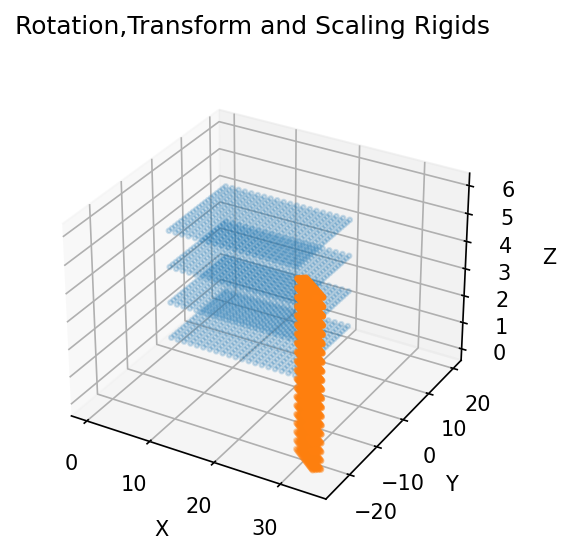

In [15]:
RTSrigidp = affine_transfoTrm(0.3,90,-45,0,30,-20,0,rigidp)

fig = plt.figure(dpi=150)
ax = plt.axes(projection='3d')

ax.scatter3D(X,Y,Z,marker = '.' ,alpha=0.2)
ax.scatter3D(RTSrigidp[0],RTSrigidp[1],RTSrigidp[2],marker = '.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.suptitle("Rotation,Transform and Scaling Rigids")

#### Question(d):  Determine type of matrix

M1: All axies rotation transform

M2: X and Y rotation transform

M3: All axies rotration transform and scaling

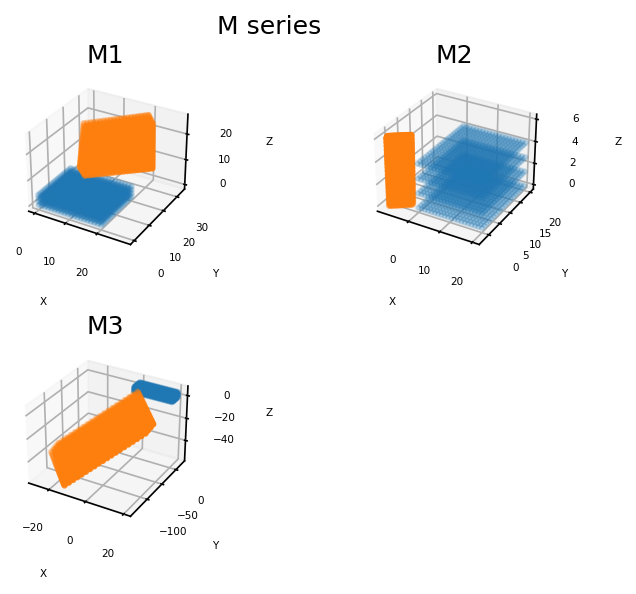

In [16]:
fig = plt.figure(dpi=150)
plt.suptitle('M series')
plt.subplots_adjust(wspace =0, hspace =0.5)
fig.tight_layout()

ax = fig.add_subplot(2, 2, 1, projection='3d')
M1 = [[0.9045,-0.3847,-0.1840,10],
      [0.2939,0.8750,-0.3847,10],
      [0.3090,0.2938,0.9045,10],
      [0,0,0,1]]
RM1 = np.dot(M1,rigidp)
ax.scatter3D(X,Y,Z,marker = '.' ,alpha=0.2)
ax.scatter3D(RM1[0],RM1[1],RM1[2],marker = '.')
ax.set_title('M1')
ax.set_xlabel('X',fontsize =5)
ax.set_ylabel('Y',fontsize =5)
ax.set_zlabel('Z',fontsize =5)
ax.tick_params(axis='both', which='major', labelsize=5)

M2 = [[-0.0000,-0.2598,0.1500,-3.0],
      [0.0000,-0.1500,-0.2598,1.5],
      [0.30000,-0.0000,0.0000,0],
      [0,0,0,1]]
RM2 = np.dot(M2,rigidp)
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter3D(X,Y,Z,marker = '.' ,alpha=0.2)
ax.scatter3D(RM2[0],RM2[1],RM2[2],marker = '.')
ax.set_title('M2')
ax.set_xlabel('X',fontsize =5)
ax.set_ylabel('Y',fontsize =5)
ax.set_zlabel('Z',fontsize =5)
ax.tick_params(axis='both', which='major', labelsize=5)

M3 = [[0.7182,-1.3727,-0.5660,1.8115],
      [-1.9236,-4.6556,-2.5512,0.2873],
      [-0.6426,-1.7985,-1.6285,0.7404],
      [0,0,0,1]]
RM3 = np.dot(M3,rigidp)
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter3D(X,Y,Z,marker = '.' ,alpha=0.2)
ax.scatter3D(RM3[0],RM3[1],RM3[2],marker = '.')
ax.set_xlabel('X',fontsize =5)
ax.set_ylabel('Y',fontsize =5)
ax.set_zlabel('Z',fontsize =5)
ax.set_title('M3')
ax.tick_params(axis='both', which='major', labelsize=5) 

M2: X and Y rotation transform

### Part 4: : Simple 2d Registration

#### Question(a): translation an image

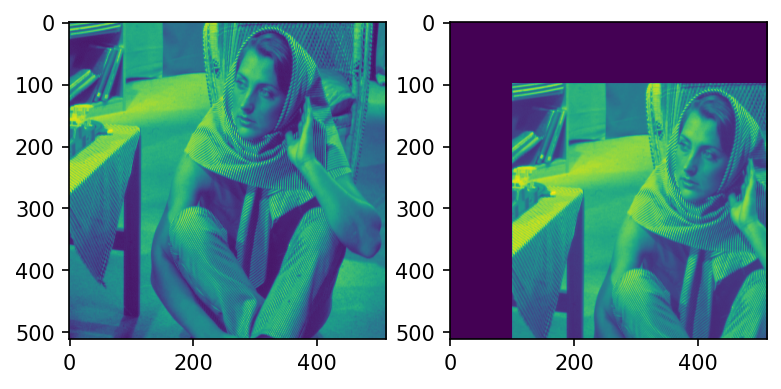

In [17]:
def translation(I,p,q):
    x = np.linspace(0,I.shape[0],I.shape[0])
    y = np.linspace(0,I.shape[1],I.shape[1])
    f = interp2d(x+p,y+q,I,fill_value = 0)
    znew = f(x,y)
    return znew
Inew = translation(I1,100,100)

plt.figure(dpi = 150)
plt.subplot(1,2,1)
plt.imshow(I1)
plt.subplot(1,2,2)
plt.imshow(Inew)

#### Question(b): minimize SSD

In [18]:
bI1 = plt.imread("/Users/tinan/Downloads/Data/BrainMRI_1.jpg")
bI2 = plt.imread("/Users/tinan/Downloads/Data/BrainMRI_2.jpg")
bI3 = plt.imread("/Users/tinan/Downloads/Data/BrainMRI_3.jpg")
bI4 = plt.imread("/Users/tinan/Downloads/Data/BrainMRI_4.jpg")

In [19]:
def TminSSD(I2,I1):
    p ,q = 0,0
    plist = []
    qlist = []
    SSDlist = []
    for i in range(300):
        Iguess = translation(I1,p,q)
        gy,gx = np.gradient(I2)
        dx = -2*np.sum((np.array(Iguess)-np.array(I2))*np.array(gx))
        dy = -2*np.sum((np.array(Iguess)-np.array(I2))*np.array(gy))
        SSD = np.sum((np.array(Iguess)-np.array(I2))**2)
        SSDlist.append(SSD)
        plist.append(p)
        qlist.append(q)
        p = p-0.0000001*dx
        q = q-0.0000001*dy
    return SSDlist, plist, qlist

In [20]:
SSDT2list,p2,q2 = TminSSD(bI2,bI1)
SSDT3list,p3,q3 = TminSSD(bI3,bI1)
SSDT4list,p4,q4 = TminSSD(bI4,bI1)

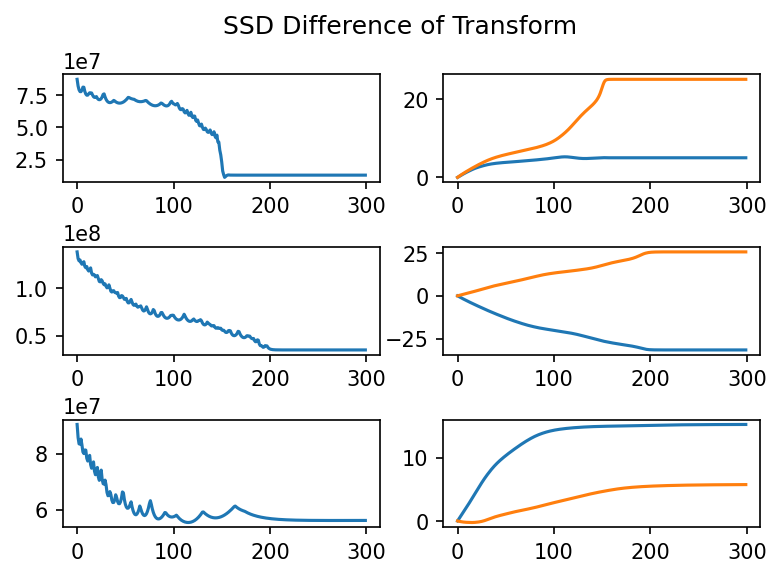

In [21]:
plt.figure(dpi = 150)
plt.suptitle("SSD Difference of Transform")
plt.subplot(3,2,1)
plt.plot(SSDT2list)
plt.subplot(3,2,2)
plt.plot(p2)
plt.plot(q2)
plt.subplot(3,2,3)
plt.plot(SSDT3list)
plt.subplot(3,2,4)
plt.plot(p3)
plt.plot(q3)
plt.subplot(3,2,5)
plt.plot(SSDT4list)
plt.subplot(3,2,6)
plt.plot(p4)
plt.plot(q4)
plt.subplots_adjust(wspace=0.2, hspace=0.6)

#### Question(c）: Image rotation

In [22]:
def rotation(I,theta):
    row,col = I.shape[0],I.shape[1]
    x = np.linspace(0,row,row)
    y = np.linspace(0,col,col)
    z = np.ravel(I)
    theta = np.deg2rad(theta)-(np.pi/2)
    X,Y = np.meshgrid(x,y)
    X = np.ravel(X)
    Y = np.ravel(Y)
    c,s = np.cos(theta),np.sin(theta)
    Rtheta = [[c,-s],
              [s,c]]
    xnew,ynew = np.dot(Rtheta,[X,Y])
    xmax,xmin,ymax,ymin = np.max(xnew),np.min(xnew),np.max(ynew),np.min(ynew)
    xbin = (xmax-xmin)/row
    ybin = (ymax-ymin)/col
    newI = np.zeros((row+1,col+1))
    for i in range(row*col):
        newI[int((xnew[i]-xmin)/xbin)][int((ynew[i]-ymin)/ybin)]=z[i]
    return newI[0:row,0:col]

In [23]:
bIR1 = rotation(bI1,30)
bIR2 = rotation(bI1,90)

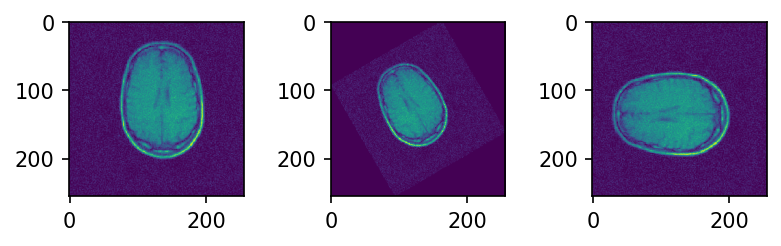

In [24]:
plt.figure(dpi = 150)
plt.subplot(1,3,1)
plt.imshow(bI1)
plt.subplot(1,3,2)
plt.imshow(bIR1)
plt.subplot(1,3,3)
plt.imshow(bIR2)
plt.subplots_adjust(wspace=0.5)

#### Question(d）: Minimize SSD

In [25]:
def RminSSD(I3,I1):
    row,col = I3.shape[0],I3.shape[1]
    theta = 0
    thetalist = []
    SSDlist=[]
    x = np.linspace(0,row,row)
    y = np.linspace(0,col,col)
    X,Y = np.array(np.meshgrid(x,y))
    for i in range(150):
         Iguess = rotation(I1,theta)
         SSD = np.sum((np.array(Iguess)-np.array(I3))**2)
         gy,gx = np.gradient(Iguess)
         c,s = np.cos(np.deg2rad(theta)),np.sin(np.deg2rad(theta))
         multix = -(s*X)-(c*Y)
         multiy = (c*X)-(s*Y)
         dtheta = -2*np.sum((np.array(Iguess)-np.array(I3))*(gx*multix+gy*multiy))
         theta = theta-0.00000001*dtheta
         thetalist.append(theta)
         SSDlist.append(SSD)
    return SSDlist,thetalist

In [26]:
SSDR2,theta2 = RminSSD(bI2,bI1)
SSDR3,theta3 = RminSSD(bI3,bI1)
SSDR4,theta4 = RminSSD(bI4,bI1)

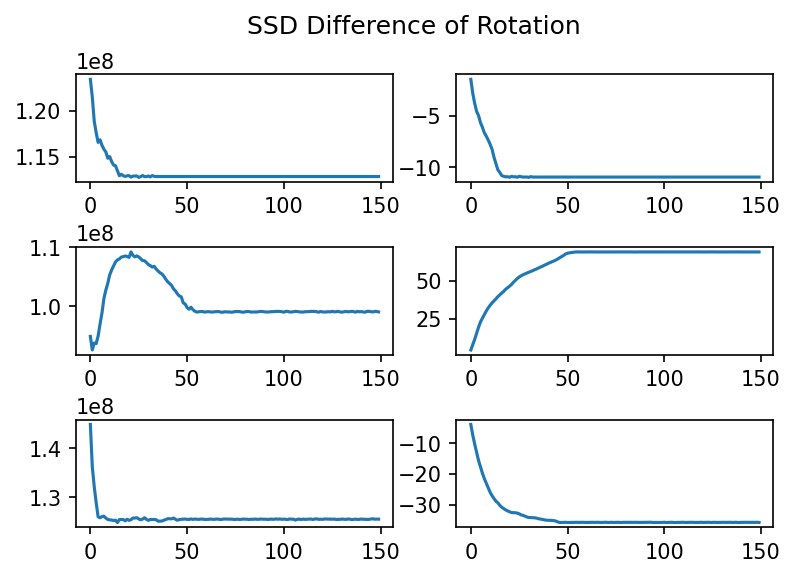

In [27]:
plt.figure(dpi = 150)
plt.suptitle("SSD Difference of Rotation")
plt.subplot(3,2,1)
plt.plot(SSDR2)
plt.subplot(3,2,2)
plt.plot(theta2)
plt.subplot(3,2,3)
plt.plot(SSDR3)
plt.subplot(3,2,4)
plt.plot(theta3)
plt.subplot(3,2,5)
plt.plot(SSDR4)
plt.subplot(3,2,6)
plt.plot(theta4)
plt.subplots_adjust(wspace=0.2, hspace=0.6)

#### Question(d）: Minimize SSD of Transform and Rotation

In [28]:
def TRminSSD(I3,I1):
    row,col = I3.shape[0],I3.shape[1]
    theta,p,q = 0,0,0
    thetalist = []
    plist = []
    qlist = []
    SSDlist = []
    x = np.linspace(0,row,row)
    y = np.linspace(0,col,col)
    X,Y = np.array(np.meshgrid(x,y))
    for i in range(200):
        Iguess = rotation(I1,theta)
        Iguess = translation(Iguess,p,q)
        SSD = np.sum((np.array(Iguess)-np.array(I3))**2)
        gy,gx = np.gradient(Iguess)
        dx = -2*np.sum((np.array(Iguess)-np.array(I3))*np.array(gx))
        dy = -2*np.sum((np.array(Iguess)-np.array(I3))*np.array(gx))
        c,s = np.cos(np.deg2rad(theta)),np.sin(np.deg2rad(theta))
        multix = -(s*X)-(c*Y)
        multiy = (c*X)-(s*Y)
        dtheta = -2*np.sum((np.array(Iguess)-np.array(I3))*(gx*multix+gy*multiy))
        p = p-0.0000001*dx
        q = q-0.0000001*dy
        theta = theta-0.00000001*dtheta
        thetalist.append(theta),plist.append(p),qlist.append(q),SSDlist.append(SSD)
    return thetalist,plist,qlist,SSDlist

In [29]:
theta2list,p2list,q2list,SSD2list = TRminSSD(bI2,bI1)
theta3list,p3list,q3list,SSD3list = TRminSSD(bI3,bI1)
theta4list,p4list,q4list,SSD4list = TRminSSD(bI4,bI1)

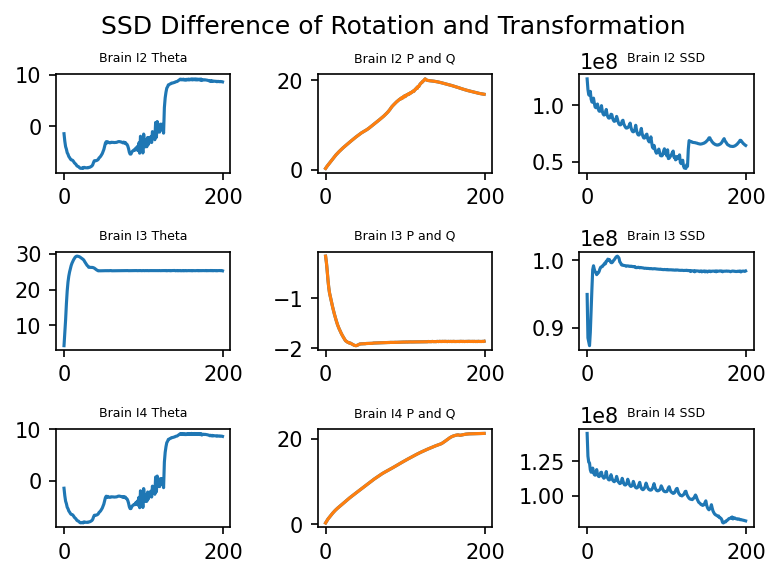

In [30]:
plt.figure(dpi = 150)
plt.suptitle("SSD Difference of Rotation and Transformation")
plt.subplot(3,3,1)
plt.plot(theta2list)
plt.title("Brain I2 Theta",fontsize = 6)
plt.subplot(3,3,2)
plt.plot(p2list)
plt.plot(q2list)
plt.title("Brain I2 P and Q",fontsize = 6)
plt.subplot(3,3,3)
plt.plot(SSD2list)
plt.title("Brain I2 SSD",fontsize = 6)
plt.subplot(3,3,4)
plt.plot(theta3list)
plt.title("Brain I3 Theta",fontsize = 6)
plt.subplot(3,3,5)
plt.plot(p3list)
plt.plot(q3list)
plt.title("Brain I3 P and Q",fontsize = 6)
plt.subplot(3,3,6)
plt.plot(SSD3list)
plt.title("Brain I3 SSD",fontsize = 6)
plt.subplot(3,3,7)
plt.plot(theta2list)
plt.title("Brain I4 Theta",fontsize = 6)
plt.subplot(3,3,8)
plt.plot(p4list)
plt.plot(q4list)
plt.title("Brain I4 P and Q",fontsize = 6)
plt.subplot(3,3,9)
plt.plot(SSD4list)
plt.title("Brain I4 SSD",fontsize = 6)
plt.subplots_adjust(wspace=0.5, hspace=0.8)

As the figure showned above, only the rotation element is converge. The other two are failed to converge.The reason is that SSD changes not only by translation but also by rotation.

### Part 5 ANTs

In [31]:
import ants

In [32]:
tof = ants.image_read("/Users/tinan/Downloads/tof.nii")
t1 = ants.image_read("/Users/tinan/Downloads/t1.nii")

In [33]:
tof

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (480, 640, 163)
	 Spacing    : (0.3, 0.3, 0.3)
	 Origin     : (-62.8709, 60.0364, -43.4285)
	 Direction  : [ 0.9995 -0.0256 -0.0189 -0.0221 -0.9864  0.1628  0.0228  0.1623  0.9865]

In [34]:
t1

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (274, 384, 384)
	 Spacing    : (0.7, 0.6667, 0.6667)
	 Origin     : (-80.7058, 114.9834, -116.7025)
	 Direction  : [ 0.9968 -0.0317 -0.0732 -0.0369 -0.9968 -0.0712  0.0707 -0.0737  0.9948]

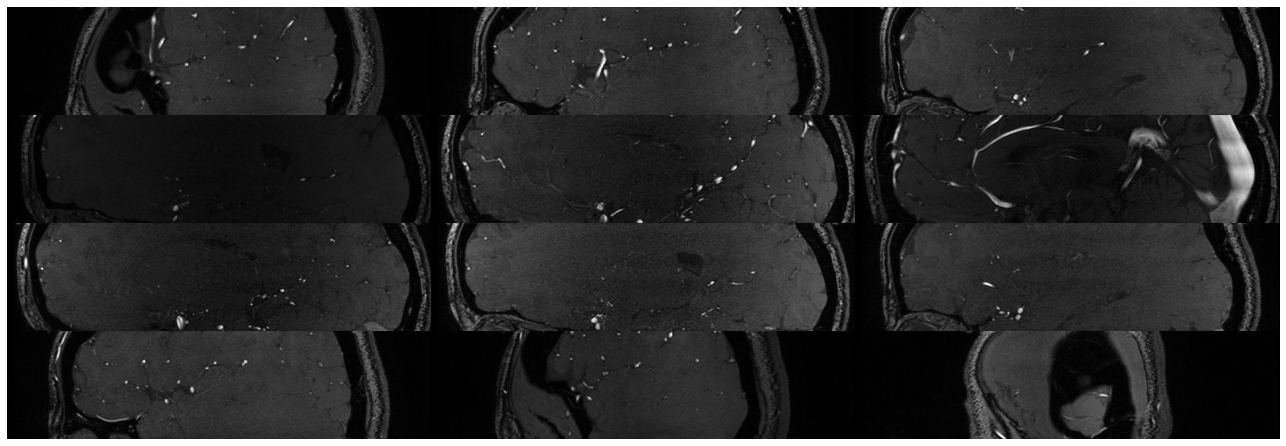

In [35]:
ants.plot( tof )

/Users/tinan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



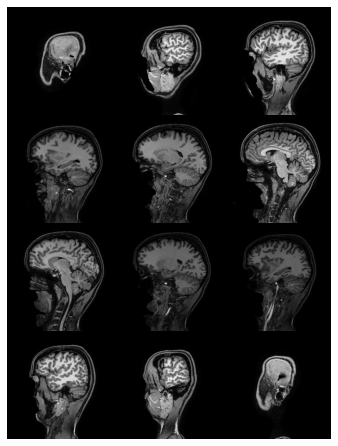

In [36]:
ants.plot( t1 )

/Users/tinan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



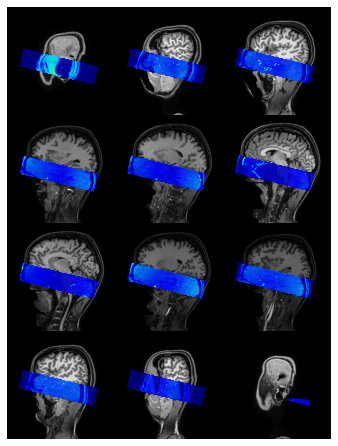

In [37]:
ants.plot( t1, tof )

In [38]:
reg12 = ants.registration(t1,tof,type_of_transform='SyN')

/Users/tinan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [39]:
reg12

{'warpedmovout': ANTsImage (RPI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (274, 384, 384)
 	 Spacing    : (0.7, 0.6667, 0.6667)
 	 Origin     : (-80.7058, 114.9834, -116.7025)
 	 Direction  : [ 0.9968 -0.0317 -0.0732 -0.0369 -0.9968 -0.0712  0.0707 -0.0737  0.9948],
 'warpedfixout': ANTsImage (RPI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (480, 640, 163)
 	 Spacing    : (0.3, 0.3, 0.3)
 	 Origin     : (-62.8709, 60.0364, -43.4285)
 	 Direction  : [ 0.9995 -0.0256 -0.0189 -0.0221 -0.9864  0.1628  0.0228  0.1623  0.9865],
 'fwdtransforms': ['/var/folders/nb/__tjss050g984s8kzplgqxqr0000gn/T/tmp0x3hzz491Warp.nii.gz',
  '/var/folders/nb/__tjss050g984s8kzplgqxqr0000gn/T/tmp0x3hzz490GenericAffine.mat'],
 'invtransforms': ['/var/folders/nb/__tjss050g984s8kzplgqxqr0000gn/T/tmp0x3hzz490GenericAffine.mat',
  '/var/folders/nb/__tjss050g984s8kzplgqxqr0000gn/T/tmp0x3hzz491InverseWarp.nii.gz']}

In [40]:
mytx=reg12['invtransforms']+reg12['invtransforms']

In [41]:
seg1 = ants.kmeans_segmentation( t1, 2 )

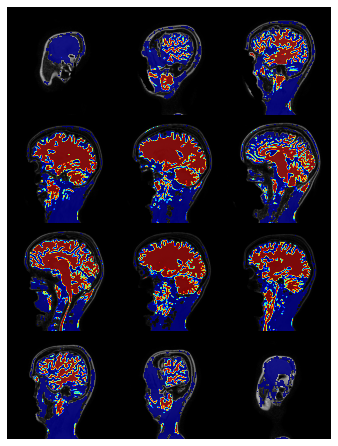

In [42]:
ants.plot( t1, seg1['segmentation'] )

/Users/tinan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



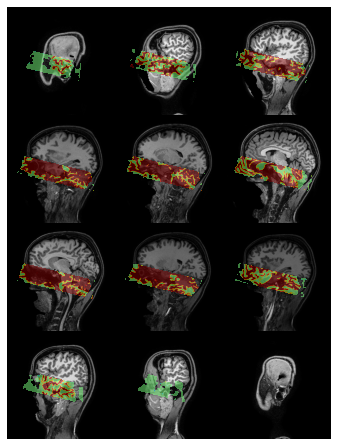

In [43]:
mywarpedimage = ants.apply_transforms( fixed = tof,
                                      moving = seg1['segmentation'],
                                       transformlist = mytx, 
                                       interpolator  = 'nearestNeighbor', 
                                       whichtoinvert = [True,False,True,False])
ants.plot( t1, mywarpedimage, overlay_alpha = 0.5 )